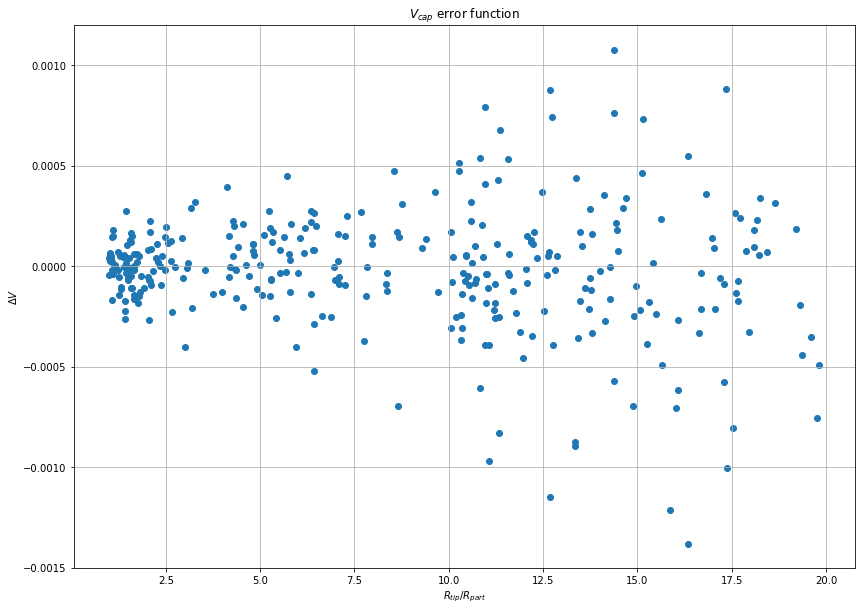

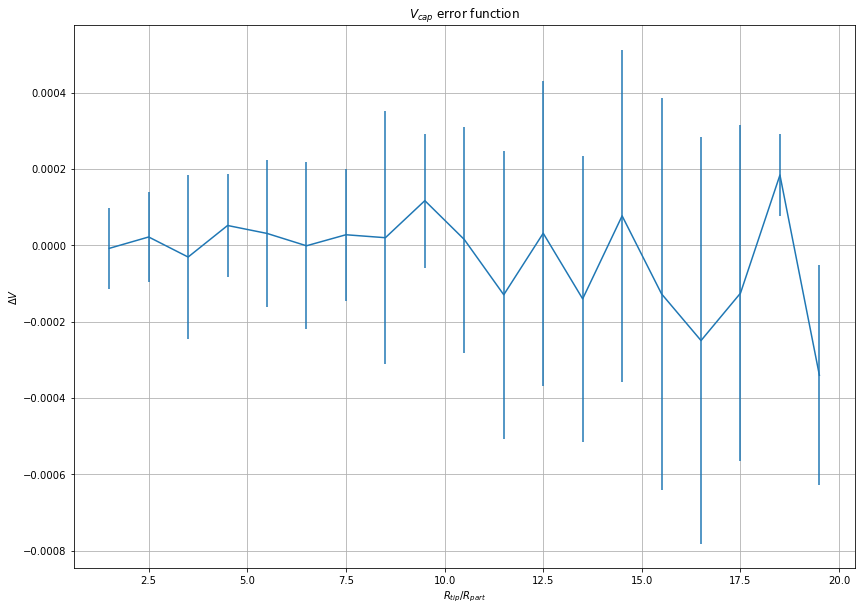

In [1]:
import numpy as np
import matplotlib.pyplot as plt

nameoffile=['capOnsph.dat','capOnsph2.dat','capOnsph3.dat','capOnsph4.dat','capOnsph5.dat']
dV_all=np.array([])
R_rel=np.array([])
for nof in nameoffile:
    h,r,A,V,dV=np.loadtxt(nof)

    inp=open(nof) #leggo i dati
    file=inp.readline()
    inp.close()

    start=file.find('R_tip=') +6
    end  =file.find(';', start)
    Rtip=float(file[start:end])
    start=file.find('Npx=', end) +4
    end  =file.find(';', start)
    Npx=float(file[start:end])
    start=file.find('pxlen=', end) +6
    end  =file.find(';', start)
    pxlen=float(file[start:end])

    dV_all=np.append(dV_all, dV)
    R_rel=np.append(R_rel, Rtip/h)



plt.figure(figsize=(14,10))
plt.title(r'$V_{cap}$ error function')
plt.scatter(R_rel, dV_all)
plt.xlabel(r'$ R_{tip} / R_{part} $')
plt.ylabel(r'$ \Delta V $')
plt.grid()
plt.show()

bin_size=1
xhist=np.arange(1,21, bin_size)
yhist=np.zeros(len(xhist)-1)
err=np.zeros(len(xhist)-1)
#counter=np.zeros(len(yhist)-1)
for i in range(len(xhist)-1):
    index=(R_rel/bin_size >=xhist[i]) & (R_rel/bin_size <xhist[i+1])
    yhist[i]=np.mean(dV_all[index])
    err[i]=np.std(dV_all[index])
    
plt.figure(figsize=(14,10))
plt.title(r'$V_{cap}$ error function')
plt.errorbar(np.delete(xhist, -1) +bin_size/2 , yhist, yerr=err)
plt.xlabel(r'$ R_{tip} / R_{part} $')
plt.ylabel(r'$ \Delta V $')
plt.grid()
plt.show()